# Telecom Churn Case Study

### Problem Statement:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
 

The company wants to know:
- **Which variables are significant in which customers are at high risk of churn**.
- **How well those variables describe the high risk of churn**.



### Business Goal

To reduce customer churn, telecom companies need to **predict which customers are at high risk of churn**. In this project, you will analyze customer-level data of a leading telecom firm, and build predictive models to identify customers at high risk of churn.

In [561]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [562]:
telecom_df = pd.read_csv("train.csv")

telecom_df_test = pd.read_csv("test.csv")
telecom_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [563]:
telecom_df.shape

(69999, 172)

### Data Overview

In [564]:
##import data info
telecom_df.info()

# total 172 columns 
#dtypes float64 count is 135
#int64 count is 28
#object count is 9

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [565]:
# check for na values
nulls_na_count = telecom_df.loc[:, telecom_df.isnull().any()].isnull().sum();
nulls_na_count

loc_og_t2o_mou            702
std_og_t2o_mou            702
loc_ic_t2o_mou            702
last_date_of_month_7      399
last_date_of_month_8      733
                        ...  
night_pck_user_7        52134
night_pck_user_8        51582
fb_user_6               52431
fb_user_7               52134
fb_user_8               51582
Length: 125, dtype: int64

In [566]:
telecom_df.nunique()
#there are no duplicates

id                   69999
circle_id                1
loc_og_t2o_mou           1
std_og_t2o_mou           1
loc_ic_t2o_mou           1
                     ...  
aon                   3455
aug_vbc_3g           10609
jul_vbc_3g           10257
jun_vbc_3g            9617
churn_probability        2
Length: 172, dtype: int64

In [567]:
telecom_df.select_dtypes(include='object').head().columns
#we can see that object types are left are date fields

Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [568]:
id_cols = ['id','circle_id']

date_cols = ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8']

cat_cols = ['fb_user_6','fb_user_7','fb_user_8',
            'night_pck_user_6','night_pck_user_7','night_pck_user_8']

num_cols = [column for column in telecom_df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom_df.shape[1])

#ID cols: 2
#Date cols:9
#Numeric cols:155
#Category cols:6
True


####  Insights
- we can see cleary there are total 9 date cols and 6 category cols and 155 numeric cols

### Handling missing values

In [569]:
telecom_df.isnull().sum()*100/telecom_df.shape[0]

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

### impute missing values

#### Imputing with zeroes

In [570]:
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
                 ]

In [571]:
telecom_df[recharge_cols].head()

#the recharge date and the recharge value are missing together which means the customer didn't recharge
#which means we can assume as zero as they didn't recharged

total_rech_data_6  total_rech_data_7  total_rech_data_8  count_rech_2g_6  \
0                NaN                NaN                NaN              NaN   
1                NaN                1.0                NaN              NaN   
2                NaN                NaN                NaN              NaN   
3                NaN                NaN                NaN              NaN   
4                7.0                7.0                6.0              7.0   

   count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  count_rech_3g_7  \
0              NaN              NaN              NaN              NaN   
1              0.0              NaN              NaN              1.0   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              6.0              6.0              0.0              1.0   

   count_rech_3g_8  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN            145.0              NaN   
2              NaN              NaN              NaN              NaN   
3              NaN              NaN              NaN              NaN   
4              0.0             25.0             41.0             25.0   

   av_rech_amt_data_6  av_rech_amt_data_7  av_rech_amt_data_8  
0                 NaN                 NaN                 NaN  
1                 NaN               145.0                 NaN  
2                 NaN                 NaN                 NaN  
3                 NaN                 NaN                 NaN  
4               175.0               191.0               142.0

In [572]:
# impute missing values with 0
telecom_df[recharge_cols] = telecom_df[recharge_cols].apply(lambda x: x.fillna(0))

In [573]:
# impute missing values with 0
telecom_df_test[recharge_cols] = telecom_df_test[recharge_cols].apply(lambda x: x.fillna(0))

In [574]:
telecom_df.shape, telecom_df_test.shape

((69999, 172), (30000, 171))

In [575]:
# now, let's make sure values are imputed correctly
print("Missing value ratio:\n")
print(telecom_df[recharge_cols].isnull().sum()*100/telecom_df.shape[1])

# summary
print("\n\nSummary statistics\n")
print(telecom_df[recharge_cols].describe())

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       69999.000000       69999.000000       69999.000000   
mean            0.619309           0.683981           0.697867   
std             1.762010           1.943193           1.973434   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.00000

In [576]:
# drop id and date columns
print("Shape before dropping: ", telecom_df.shape)
telecom_df = telecom_df.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", telecom_df.shape)

Shape before dropping:  (69999, 172)
Shape after dropping:  (69999, 161)


In [577]:
# drop id and date columns
print("Shape before dropping: ", telecom_df_test.shape)
telecom_df_test = telecom_df_test.drop(id_cols + date_cols, axis=1)
print("Shape after dropping: ", telecom_df_test.shape)

Shape before dropping:  (30000, 171)
Shape after dropping:  (30000, 160)


#### Replace NaN values in categorical variables

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [578]:
# replace missing values with '-1' in categorical columns
telecom_df[cat_cols] = telecom_df[cat_cols].apply(lambda x: x.fillna(-1))

In [579]:
# replace missing values with '-1' in categorical columns
telecom_df_test[cat_cols] = telecom_df_test[cat_cols].apply(lambda x: x.fillna(-1))

In [580]:
# missing value ratio
print("Missing value ratio:\n")
print(telecom_df[cat_cols].isnull().sum()*100/telecom_df.shape[0])

Missing value ratio:

fb_user_6           0.0
fb_user_7           0.0
fb_user_8           0.0
night_pck_user_6    0.0
night_pck_user_7    0.0
night_pck_user_8    0.0
dtype: float64


In [581]:
telecom_df.shape, telecom_df_test.shape

((69999, 161), (30000, 160))

#### Drop variables with more than a given threshold of missing values

In [582]:
initial_cols = telecom_df.shape[1]

MISSING_THRESHOLD = 0.7

include_cols = list(telecom_df.apply(lambda column: True if column.isnull().sum()/telecom_df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':telecom_df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

features  include
0       loc_og_t2o_mou     True
1       std_og_t2o_mou     True
2       loc_ic_t2o_mou     True
3               arpu_6     True
4               arpu_7     True
..                 ...      ...
156                aon     True
157         aug_vbc_3g     True
158         jul_vbc_3g     True
159         jun_vbc_3g     True
160  churn_probability     True

[155 rows x 2 columns]

#### Filter High value customers

In [583]:
# Drop Columns with > 30% of missing values except 9th Month's columns
cols = telecom_df.columns
telecom_null_perc = telecom_df.isnull().sum() * 100 / len(telecom_df)
telecom_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': telecom_null_perc})

drop_cols = telecom_null_df.loc[(telecom_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
telecom_df.drop(drop_cols, axis=1,inplace = True)
telecom_df.shape

list of columns dropped: arpu_3g_6    arpu_3g_6
arpu_3g_7    arpu_3g_7
arpu_3g_8    arpu_3g_8
arpu_2g_6    arpu_2g_6
arpu_2g_7    arpu_2g_7
arpu_2g_8    arpu_2g_8
Name: col_name, dtype: object


(69999, 155)

In [584]:
telecom_df_test.drop(drop_cols, axis=1,inplace = True)

In [585]:
telecom_df.shape, telecom_df_test.shape

((69999, 155), (30000, 154))

In [586]:
#  drop the highly correlated ones
cor = telecom_df.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_7      max_rech_data_7      0.600074
fb_user_8         fb_user_6            0.600354
loc_og_mou_8      loc_og_t2m_mou_6     0.600364
night_pck_user_8  total_rech_data_8    0.600686
fb_user_7         total_rech_data_7    0.601222
                                         ...   
                  night_pck_user_7     0.970696
fb_user_6         night_pck_user_6     0.971839
sachet_2g_6       count_rech_2g_6      0.980998
sachet_2g_7       count_rech_2g_7      0.983300
sachet_2g_8       count_rech_2g_8      0.983562
Length: 291, dtype: float64

In [587]:
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2m_mou_8',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                ]
                 
telecom_df.drop(drop_col_list, axis=1, inplace=True)
telecom_df.shape

(69999, 118)

In [588]:
telecom_df_test.drop(drop_col_list, axis=1, inplace=True)
telecom_df_test.shape

(30000, 117)

In [589]:
nullpercents = (telecom_df.isnull().sum() * 100 / len(telecom_df)).sort_values(ascending = False)

In [590]:
nullcols = nullpercents.index

In [591]:
nullcols

Index(['spl_ic_mou_8', 'std_ic_t2t_mou_8', 'std_og_mou_8', 'std_og_t2f_mou_8',
       'isd_og_mou_8', 'loc_og_mou_8', 'spl_og_mou_8', 'loc_og_t2c_mou_8',
       'og_others_8', 'roam_og_mou_8',
       ...
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'churn_probability'],
      dtype='object', length=118)

In [592]:
telecom_df.shape

(69999, 118)

In [593]:
for col in nullcols:
    telecom_df = telecom_df[~np.isnan(telecom_df[col])]

In [594]:
for col in nullcols:
    if col != 'churn_probability':
        telecom_df_test[col] =  telecom_df_test[col].fillna(0)

In [595]:
# lets check the dataset again
(telecom_df.isnull().sum() * 100 / len(telecom_df)).sort_values(ascending = False)

loc_og_t2o_mou        0.0
last_day_rch_amt_6    0.0
count_rech_3g_6       0.0
count_rech_2g_8       0.0
count_rech_2g_7       0.0
                     ... 
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_8          0.0
churn_probability     0.0
Length: 118, dtype: float64

In [596]:
telecom_df['churn_probability'].value_counts()/len(telecom_df)*100

0    94.055637
1     5.944363
Name: churn_probability, dtype: float64

In [597]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in telecom_df.columns:
    if telecom_df[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [598]:
# Drop single value columns
telecom_df.drop(drop_col_sngl_val, axis=1, inplace=True)
telecom_df.shape

(63842, 109)

In [599]:
# Drop single value columns
telecom_df_test.drop(drop_col_sngl_val, axis=1, inplace=True)
telecom_df_test.shape

(30000, 108)

#### Deriving new columns

In [600]:
telecom_df['total_mou_6'] = telecom_df['onnet_mou_6'] + telecom_df['offnet_mou_6']
telecom_df['total_mou_7'] = telecom_df['onnet_mou_7'] + telecom_df['offnet_mou_7']
telecom_df['total_mou_8'] = telecom_df['onnet_mou_8'] + telecom_df['offnet_mou_8']

# Drop the redundant columns
telecom_df.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

telecom_df.head()

arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   31.277   87.009    7.527           0.00            0.0            0.0   
1    0.000  122.787   42.953           0.00            0.0            0.0   
2   60.806  103.176    0.000           0.00            0.0            0.0   
3  156.362  205.260  111.095           0.00            0.0            0.0   
4  240.708  128.191  101.565          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  ...  \
0           0.00            0.0           0.00              0.00  ...   
1           0.00            0.0           0.00              0.00  ...   
2           0.00            0.0           0.00              2.14  ...   
3           0.00            0.0           1.63              0.00  ...   
4          15.73            0.0           0.00              0.00  ...   

   fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0       -1.0       -1.0  1958         0.0         0.0         0.0   
1        1.0       -1.0   710         0.0         0.0         0.0   
2       -1.0       -1.0   882         0.0         0.0         0.0   
3       -1.0       -1.0   982         0.0         0.0         0.0   
4        1.0        1.0   647         0.0         0.0         0.0   

   churn_probability  total_mou_6  total_mou_7  total_mou_8  
0                  0        80.82       221.06         3.62  
1                  0         0.00        25.99        30.89  
2                  0        54.52        97.98         0.00  
3                  0        76.02        94.49        50.23  
4                  0        78.27        42.94        15.76  

[5 rows x 106 columns]

In [601]:
telecom_df_test['total_mou_6'] = telecom_df_test['onnet_mou_6'] + telecom_df_test['offnet_mou_6']
telecom_df_test['total_mou_7'] = telecom_df_test['onnet_mou_7'] + telecom_df_test['offnet_mou_7']
telecom_df_test['total_mou_8'] = telecom_df_test['onnet_mou_8'] + telecom_df_test['offnet_mou_8']

# Drop the redundant columns
telecom_df_test.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

telecom_df_test.head()

arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0   91.882   65.330   64.445           0.00           0.00           0.00   
1  414.168  515.568  360.868           0.00           0.00           0.00   
2  329.844  434.884  746.239          22.81         103.38          26.08   
3   43.550  171.390   24.400           0.00           0.00           0.00   
4  306.854  406.289  413.329           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2c_mou_6  ...  \
0           0.00           0.00           0.00               0.0  ...   
1           0.00           0.00           0.00               0.0  ...   
2          24.53          53.68          54.44               0.0  ...   
3           0.00           0.00           0.00               0.0  ...   
4           0.00           0.00           0.00               0.0  ...   

   fb_user_6  fb_user_7  fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0       -1.0       -1.0       -1.0  1692        0.00        0.00        0.00   
1       -1.0       -1.0       -1.0  2533        0.00        0.00        0.00   
2       -1.0       -1.0       -1.0   277      525.61      758.41      241.84   
3       -1.0       -1.0       -1.0  1244        0.00        0.00        0.00   
4       -1.0       -1.0       -1.0   462        0.00        0.00        0.00   

   total_mou_6  total_mou_7  total_mou_8  
0        91.94        52.39        57.94  
1       549.85       663.05       414.78  
2        24.52        53.67        53.44  
3        45.35       207.17        24.01  
4       511.87       632.87       774.84  

[5 rows x 105 columns]

Since rest of the columns are break out of totals into granualr details we will not merge them into one, instead we will create new features that will each account for the good phase by averaging out the values for 6th and 7th month

In [602]:
col_for_6_7 = [col[:-2] for col in telecom_df.columns if '6' in col or '7' in col]
col_for_6_7

['arpu',
 'arpu',
 'roam_ic_mou',
 'roam_ic_mou',
 'roam_og_mou',
 'roam_og_mou',
 'loc_og_t2c_mou',
 'loc_og_t2c_mou',
 'loc_og_mou',
 'loc_og_mou',
 'std_og_t2f_mou',
 'std_og_t2f_mou',
 'std_og_mou',
 'std_og_mou',
 'isd_og_mou',
 'isd_og_mou',
 'spl_og_mou',
 'spl_og_mou',
 'og_others',
 'og_others',
 'loc_ic_t2m_mou',
 'loc_ic_t2m_mou',
 'loc_ic_mou',
 'loc_ic_mou',
 'std_ic_t2t_mou',
 'std_ic_t2t_mou',
 'std_ic_t2f_mou',
 'std_ic_t2f_mou',
 'std_ic_mou',
 'std_ic_mou',
 'spl_ic_mou',
 'spl_ic_mou',
 'isd_ic_mou',
 'isd_ic_mou',
 'ic_others',
 'ic_others',
 'total_rech_num',
 'total_rech_num',
 'max_rech_amt',
 'max_rech_amt',
 'last_day_rch_amt',
 'last_day_rch_amt',
 'total_rech_data',
 'total_rech_data',
 'max_rech_data',
 'max_rech_data',
 'count_rech_2g',
 'count_rech_2g',
 'count_rech_3g',
 'count_rech_3g',
 'av_rech_amt_data',
 'av_rech_amt_data',
 'vol_2g_mb',
 'vol_2g_mb',
 'night_pck_user',
 'night_pck_user',
 'monthly_2g',
 'monthly_2g',
 'sachet_2g',
 'sachet_2g',
 'mo

In [603]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in telecom_df.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    telecom_df[f'gd_ph_{col}'] = ( telecom_df[f'{col}_6'] + telecom_df[f'{col}_7'] ) / 2
    telecom_df.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
telecom_df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0    7.527            0.0           0.00              0.00          2.61   
1   42.953            0.0           0.00             29.79          0.00   
2    0.000            0.0           0.00              0.00          0.00   
3  111.095            0.0           1.63              8.03         23.63   
4  101.565            0.0           0.00              0.00         15.76   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.0          1.01           0.0          0.00          0.0   
1               0.0          0.00           0.0         31.66          0.0   
2               0.0          0.00           0.0          0.00          0.0   
3               0.0          4.60           0.0         25.61          0.0   
4               0.0          0.00           0.0          0.00          0.0   

   ...  gd_ph_loc_og_mou  gd_ph_std_ic_mou  gd_ph_spl_ic_mou  \
0  ...            11.785            17.520               0.0   
1  ...             0.000             0.000               0.0   
2  ...            18.810            16.195               0.0   
3  ...            46.875             4.585               0.0   
4  ...            42.425             0.000               0.0   

   gd_ph_roam_og_mou  gd_ph_monthly_3g  gd_ph_std_ic_t2f_mou  gd_ph_vol_2g_mb  \
0              0.000               0.0                   0.0            0.000   
1              0.000               0.5                   0.0          176.455   
2              0.000               0.0                   0.0            0.000   
3              0.000               0.0                   0.0            0.000   
4              7.865               0.0                   0.0          349.845   

   gd_ph_arpu  gd_ph_fb_user  gd_ph_count_rech_3g  
0     59.1430           -1.0                  0.0  
1     61.3935            0.0                  0.5  
2     81.9910           -1.0                  0.0  
3    180.8110           -1.0                  0.0  
4    184.4495            1.0                  0.5  

[5 rows x 72 columns]

In [604]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in telecom_df_test.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    telecom_df_test[f'gd_ph_{col}'] = ( telecom_df_test[f'{col}_6'] + telecom_df_test[f'{col}_7'] ) / 2
    telecom_df_test.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
telecom_df_test.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0   64.445           0.00           0.00              0.03         29.43   
1  360.868           0.00           0.00              0.00        397.11   
2  746.239          26.08          54.44              0.00          0.00   
3   24.400           0.00           0.00              0.00         22.86   
4  413.329           0.00           0.00              0.00         25.51   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.0         28.48           0.0          0.03          0.0   
1               0.0         17.68           0.8          0.00          0.0   
2               0.0          0.00           0.0          0.00          0.0   
3               0.0          0.00           0.0          1.15          0.0   
4               0.0        749.29           0.0          4.96          0.0   

   ...  gd_ph_loc_og_mou  gd_ph_std_ic_mou  gd_ph_spl_ic_mou  \
0  ...            43.860             0.700              0.44   
1  ...           594.575             6.255              0.00   
2  ...             0.000             0.000              0.00   
3  ...            53.435            12.885              0.00   
4  ...             3.140            74.960              0.00   

   gd_ph_roam_og_mou  gd_ph_monthly_3g  gd_ph_std_ic_t2f_mou  gd_ph_vol_2g_mb  \
0              0.000               0.0                   0.0              0.0   
1              0.000               0.0                   0.0              0.0   
2             39.105               0.0                   0.0              0.0   
3              0.000               0.0                   0.0              0.0   
4              0.000               0.0                   0.0              0.0   

   gd_ph_arpu  gd_ph_fb_user  gd_ph_count_rech_3g  
0     78.6060           -1.0                  0.0  
1    464.8680           -1.0                  0.0  
2    382.3640           -1.0                  0.0  
3    107.4700           -1.0                  0.0  
4    356.5715           -1.0                  0.0  

[5 rows x 71 columns]

In [605]:
# Create new column
telecom_df['gd_ph_vbc_3g'] = ( telecom_df['jul_vbc_3g'] + telecom_df['jun_vbc_3g'] ) / 2

# Drop redundant column
telecom_df.drop(['jul_vbc_3g', 'jun_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
telecom_df['vbc_3g_8'] = telecom_df['aug_vbc_3g']
telecom_df.drop('aug_vbc_3g', axis=1, inplace=True)

telecom_df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0    7.527            0.0           0.00              0.00          2.61   
1   42.953            0.0           0.00             29.79          0.00   
2    0.000            0.0           0.00              0.00          0.00   
3  111.095            0.0           1.63              8.03         23.63   
4  101.565            0.0           0.00              0.00         15.76   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.0          1.01           0.0          0.00          0.0   
1               0.0          0.00           0.0         31.66          0.0   
2               0.0          0.00           0.0          0.00          0.0   
3               0.0          4.60           0.0         25.61          0.0   
4               0.0          0.00           0.0          0.00          0.0   

   ...  gd_ph_spl_ic_mou  gd_ph_roam_og_mou  gd_ph_monthly_3g  \
0  ...               0.0              0.000               0.0   
1  ...               0.0              0.000               0.5   
2  ...               0.0              0.000               0.0   
3  ...               0.0              0.000               0.0   
4  ...               0.0              7.865               0.0   

   gd_ph_std_ic_t2f_mou  gd_ph_vol_2g_mb  gd_ph_arpu  gd_ph_fb_user  \
0                   0.0            0.000     59.1430           -1.0   
1                   0.0          176.455     61.3935            0.0   
2                   0.0            0.000     81.9910           -1.0   
3                   0.0            0.000    180.8110           -1.0   
4                   0.0          349.845    184.4495            1.0   

   gd_ph_count_rech_3g  gd_ph_vbc_3g  vbc_3g_8  
0                  0.0           0.0       0.0  
1                  0.5           0.0       0.0  
2                  0.0           0.0       0.0  
3                  0.0           0.0       0.0  
4                  0.5           0.0       0.0  

[5 rows x 71 columns]

In [606]:
# Create new column
telecom_df_test['gd_ph_vbc_3g'] = ( telecom_df_test['jul_vbc_3g'] + telecom_df_test['jun_vbc_3g'] ) / 2

# Drop redundant column
telecom_df_test.drop(['jul_vbc_3g', 'jun_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
telecom_df_test['vbc_3g_8'] = telecom_df_test['aug_vbc_3g']
telecom_df_test.drop('aug_vbc_3g', axis=1, inplace=True)

telecom_df_test.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0   64.445           0.00           0.00              0.03         29.43   
1  360.868           0.00           0.00              0.00        397.11   
2  746.239          26.08          54.44              0.00          0.00   
3   24.400           0.00           0.00              0.00         22.86   
4  413.329           0.00           0.00              0.00         25.51   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.0         28.48           0.0          0.03          0.0   
1               0.0         17.68           0.8          0.00          0.0   
2               0.0          0.00           0.0          0.00          0.0   
3               0.0          0.00           0.0          1.15          0.0   
4               0.0        749.29           0.0          4.96          0.0   

   ...  gd_ph_spl_ic_mou  gd_ph_roam_og_mou  gd_ph_monthly_3g  \
0  ...              0.44              0.000               0.0   
1  ...              0.00              0.000               0.0   
2  ...              0.00             39.105               0.0   
3  ...              0.00              0.000               0.0   
4  ...              0.00              0.000               0.0   

   gd_ph_std_ic_t2f_mou  gd_ph_vol_2g_mb  gd_ph_arpu  gd_ph_fb_user  \
0                   0.0              0.0     78.6060           -1.0   
1                   0.0              0.0    464.8680           -1.0   
2                   0.0              0.0    382.3640           -1.0   
3                   0.0              0.0    107.4700           -1.0   
4                   0.0              0.0    356.5715           -1.0   

   gd_ph_count_rech_3g  gd_ph_vbc_3g  vbc_3g_8  
0                  0.0         0.000      0.00  
1                  0.0         0.000      0.00  
2                  0.0       500.125    525.61  
3                  0.0         0.000      0.00  
4                  0.0         0.000      0.00  

[5 rows x 70 columns]

In [607]:
telecom_df.shape

(63842, 71)

In [608]:
# Reset the index 
telecom_df.reset_index(inplace=True, drop=True)
telecom_df.head()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0    7.527            0.0           0.00              0.00          2.61   
1   42.953            0.0           0.00             29.79          0.00   
2    0.000            0.0           0.00              0.00          0.00   
3  111.095            0.0           1.63              8.03         23.63   
4  101.565            0.0           0.00              0.00         15.76   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.0          1.01           0.0          0.00          0.0   
1               0.0          0.00           0.0         31.66          0.0   
2               0.0          0.00           0.0          0.00          0.0   
3               0.0          4.60           0.0         25.61          0.0   
4               0.0          0.00           0.0          0.00          0.0   

   ...  gd_ph_spl_ic_mou  gd_ph_roam_og_mou  gd_ph_monthly_3g  \
0  ...               0.0              0.000               0.0   
1  ...               0.0              0.000               0.5   
2  ...               0.0              0.000               0.0   
3  ...               0.0              0.000               0.0   
4  ...               0.0              7.865               0.0   

   gd_ph_std_ic_t2f_mou  gd_ph_vol_2g_mb  gd_ph_arpu  gd_ph_fb_user  \
0                   0.0            0.000     59.1430           -1.0   
1                   0.0          176.455     61.3935            0.0   
2                   0.0            0.000     81.9910           -1.0   
3                   0.0            0.000    180.8110           -1.0   
4                   0.0          349.845    184.4495            1.0   

   gd_ph_count_rech_3g  gd_ph_vbc_3g  vbc_3g_8  
0                  0.0           0.0       0.0  
1                  0.5           0.0       0.0  
2                  0.0           0.0       0.0  
3                  0.0           0.0       0.0  
4                  0.5           0.0       0.0  

[5 rows x 71 columns]

In [551]:
telecom_df.describe()

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
count  63842.000000   63842.000000   63842.000000      63842.000000   
mean     292.314734       7.021533       9.716878          1.395431   
std      355.546421      53.594527      64.893821          6.536064   
min     -945.808000       0.000000       0.000000          0.000000   
25%       96.834000       0.000000       0.000000          0.000000   
50%      204.308500       0.000000       0.000000          0.000000   
75%      383.365500       0.000000       0.000000          0.000000   
max    33543.624000    4169.810000    5337.040000        351.830000   

       loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  \
count  63842.000000      63842.000000  63842.000000  63842.000000   
mean     143.607604          1.071439    171.704436      0.805922   
std      248.494483          7.736044    407.978438     29.853519   
min        0.000000          0.000000      0.000000      0.000000   
25%       18.390000          0.000000      0.000000      0.000000   
50%       65.740000          0.000000      9.880000      0.000000   
75%      169.590000          0.000000    140.902500      0.000000   
max    11039.910000        354.160000  13980.060000   5681.540000   

       spl_og_mou_8   og_others_8  ...  gd_ph_spl_ic_mou  gd_ph_roam_og_mou  \
count  63842.000000  63842.000000  ...      63842.000000       63842.000000   
mean       5.006439      0.031459  ...          0.048385          11.873062   
std       17.831034      2.161428  ...          0.128545          57.824501   
min        0.000000      0.000000  ...          0.000000           0.000000   
25%        0.000000      0.000000  ...          0.000000           0.000000   
50%        0.000000      0.000000  ...          0.000000           0.000000   
75%        3.940000      0.000000  ...          0.025000           0.287500   
max     1075.080000    394.930000  ...         16.610000        2410.835000   

       gd_ph_monthly_3g  gd_ph_std_ic_t2f_mou  gd_ph_vol_2g_mb    gd_ph_arpu  \
count      63842.000000          63842.000000     63842.000000  63842.000000   
mean           0.074559              2.241389        53.347438    291.318130   
std            0.332007             15.456297       196.022144    321.680309   
min            0.000000              0.000000         0.000000   -451.713500   
25%            0.000000              0.000000         0.000000    109.906625   
50%            0.000000              0.000000         0.000000    209.155250   
75%            0.000000              0.355000         3.760000    371.553625   
max           10.000000           1185.045000      7939.075000  31438.461000   

       gd_ph_fb_user  gd_ph_count_rech_3g  gd_ph_vbc_3g      vbc_3g_8  
count   63842.000000         63842.000000  63842.000000  63842.000000  
mean       -0.507464             0.154405     64.628999     71.172183  
std         0.777887             0.668478    244.646908    273.208947  
min        -1.000000             0.000000      0.000000      0.000000  
25%        -1.000000             0.000000      0.000000      0.000000  
50%        -1.000000             0.000000      0.000000      0.000000  
75%         0.000000             0.000000      0.000000      0.000000  
max         1.000000            26.500000   8190.585000  12916.220000  

[8 rows x 71 columns]

#### Insights
- We can see almost every columns has some outliers, while most of them are becuase there are 0.0 as the service was not used some are actual outliers
- Since we don't have actuall bussines people to check the factfulness of the data, we will cap those features

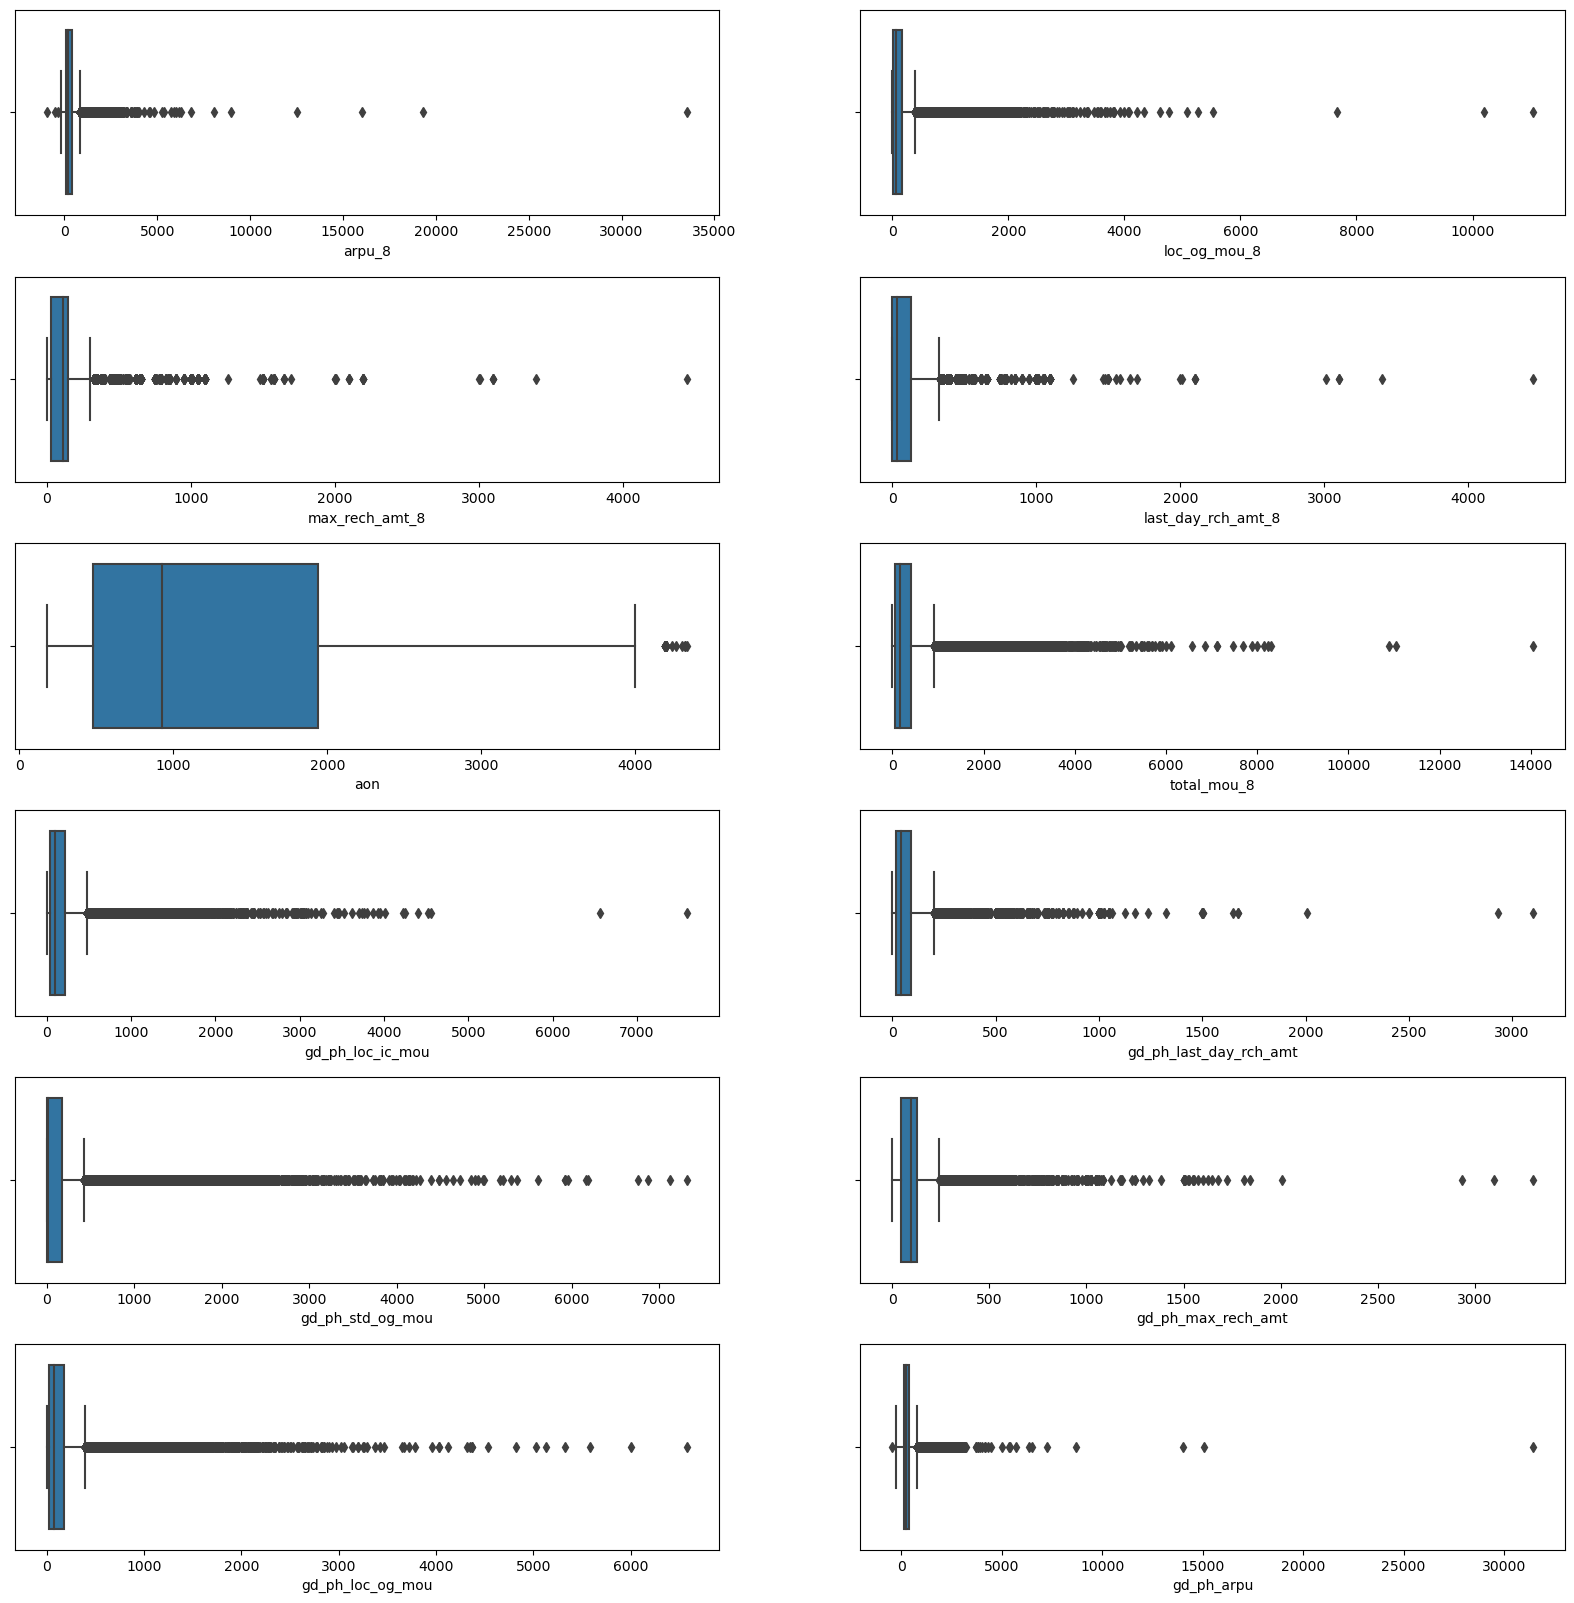

In [290]:
# Going through the output of describe we can filter out the features that needs a second look

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 'total_mou_8', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(telecom_df[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

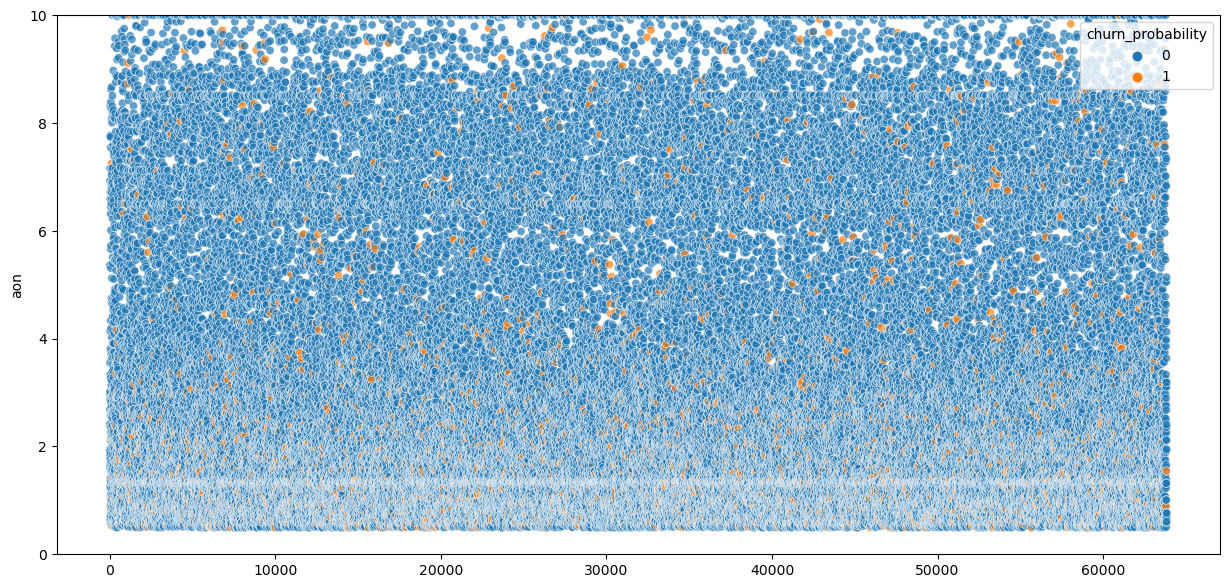

In [87]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=telecom_df['aon'] / 365, x=telecom_df.index, hue=telecom_df.churn_probability, alpha=0.7)
plt.ylim(0,10)
plt.show()

#### Insights
- Though we cannot see a clear pattern here, but we can notice that the mojority of churners had a tenure of less than 4 years

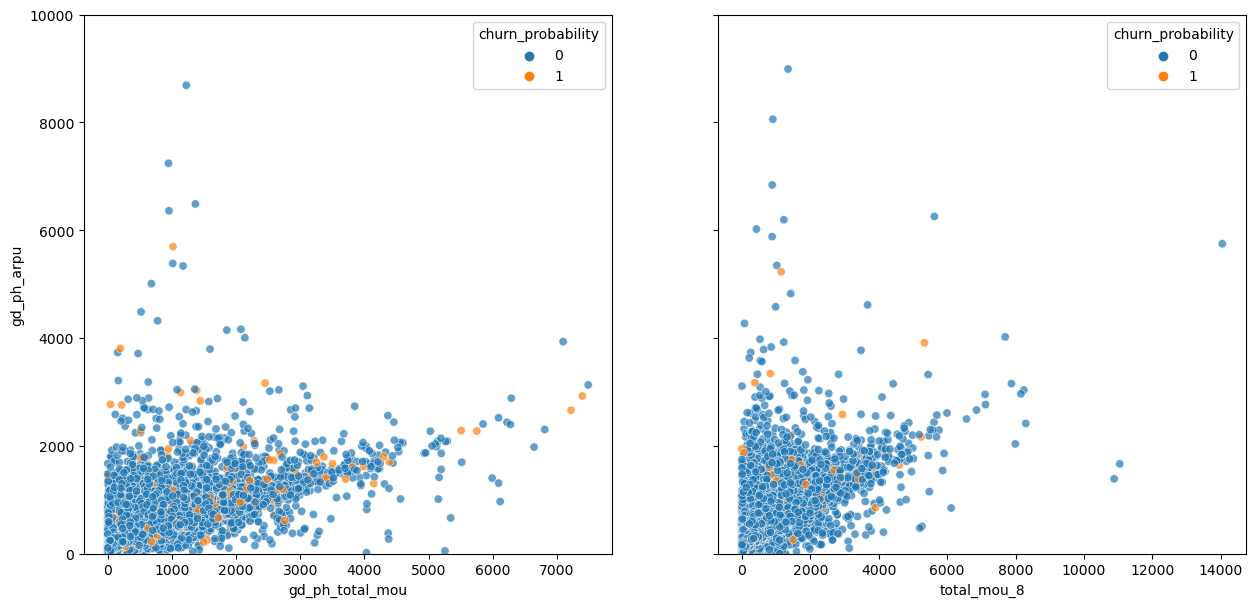

In [88]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=telecom_df, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=telecom_df, ax=axes[1], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

#### Insights
- We can clearly see that MOU have dropped significantly for the churners in the action pahse i.e 8th month, thus hitting the revenue generated from them
- It is also interesting that though the MOU is between 0-2000, the revenue is highest in that region that tells us these users had other services that were boosting the revenue

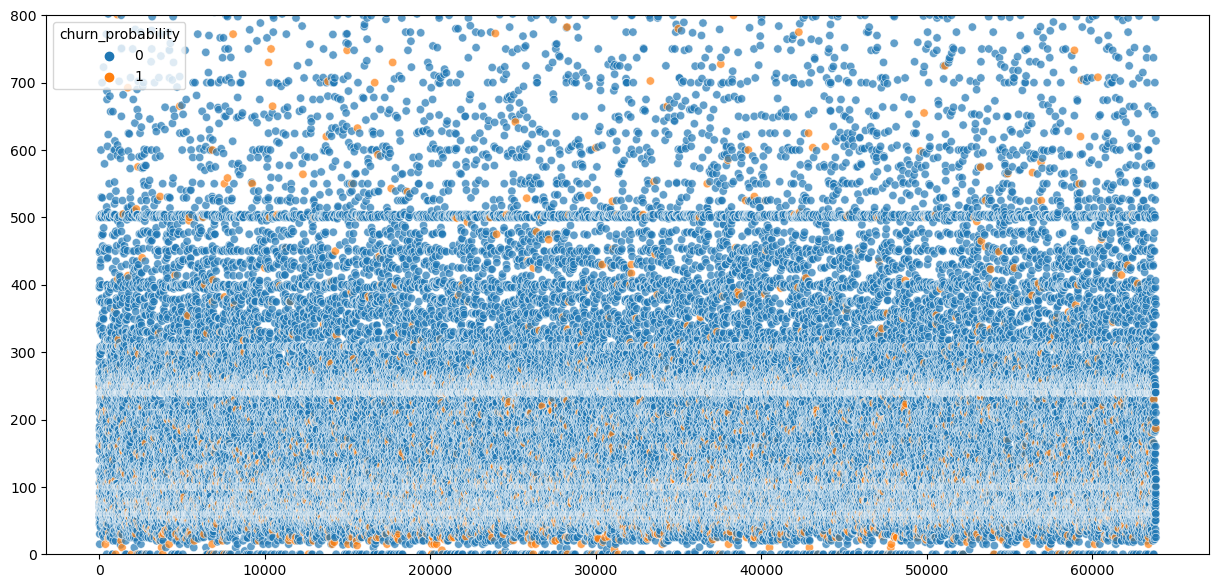

In [89]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=telecom_df.index, y=telecom_df['gd_ph_max_rech_amt'] + telecom_df['max_rech_amt_8'],
                hue=telecom_df['churn_probability'], alpha=0.7)
plt.ylim(0,800)
plt.show()

#### Insights
- We can see that users who had the max recharge amount less tha 200 churned more


In [90]:
# Cap the features with high outliers

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 3000), ('total_mou_8', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    telecom_df[col] = telecom_df[col].apply(lambda x : x if x < value else value)

telecom_df[col_boxplot].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
0    7.527          2.61              10                   0  1958   
1   42.953          0.00              50                   0   710   
2    0.000          0.00               0                   0   882   
3  111.095         23.63              50                  50   982   
4  101.565         15.76              30                  30   647   

   total_mou_8  gd_ph_loc_ic_mou  gd_ph_last_day_rch_amt  gd_ph_std_og_mou  \
0         3.62             14.01                    65.0           135.040   
1        30.89             21.44                     0.0             0.000   
2         0.00             62.86                    60.0            56.965   
3        50.23             68.05                   110.0            27.075   
4        15.76             15.45                    17.5             2.175   

   gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_arpu  
0                65.0            11.785     59.1430  
1                72.5             0.000     61.3935  
2                70.0            18.810     81.9910  
3               110.0            46.875    180.8110  
4                45.5            42.425    184.4495

In [93]:
telecom_df.columns

Index(['arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2c_mou_8',
       'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'isd_og_mou_8',
       'spl_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'total_rech_data_8', 'max_rech_data_8',
       'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8',
       'vol_2g_mb_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'fb_user_8', 'aon', 'churn_probability',
       'total_mou_8', 'gd_ph_monthly_2g', 'gd_ph_isd_ic_mou',
       'gd_ph_std_og_t2f_mou', 'gd_ph_count_rech_2g', 'gd_ph_sachet_3g',
       'gd_ph_total_rech_data', 'gd_ph_av_rech_amt_data',
       'gd_ph_total_rech_num', 'gd_ph_og_others', 'gd_ph_std_og_mou',
       'gd_ph_max_rech_data', 'gd_ph_loc_og_t2c_mou', 'gd_ph_loc_ic_mou',
       'gd_ph_ic_oth

### Data Preparation

In [94]:
y = telecom_df['churn_probability']
X = telecom_df.drop('churn_probability', axis=1)

#### Standardization

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [98]:
# Use SMOTE to take care of class imbalance
# use !pip install imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res.value_counts()

0    60047
1    60047
Name: churn_probability, dtype: int64

### PCA

In [99]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(120094, 25)

#### Decision Tree

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [103]:
    from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8553619223220127
              precision    recall  f1-score   support

           0       0.84      0.81      0.82     17883
           1       0.82      0.84      0.83     18146

    accuracy                           0.82     36029
   macro avg       0.83      0.82      0.82     36029
weighted avg       0.83      0.82      0.82     36029



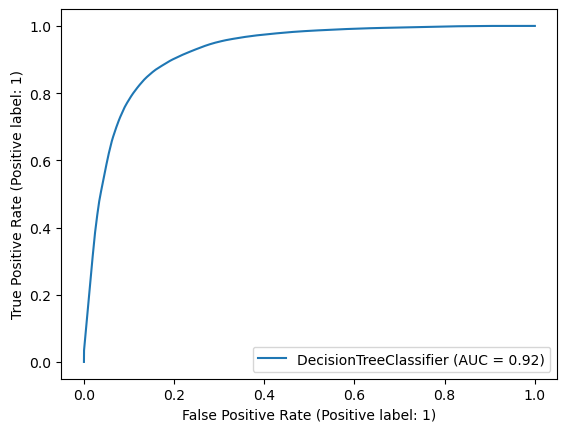

In [107]:
# Plot ROC curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(intial_dt, X_train, y_train,drop_intermediate=False)
plt.show()

#### Hyper parameter Tuning

In [108]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [109]:
grid_search.best_score_

0.8646286081532164

In [110]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=30, random_state=42)

In [111]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88     17883
           1       0.86      0.91      0.89     18146

    accuracy                           0.88     36029
   macro avg       0.88      0.88      0.88     36029
weighted avg       0.88      0.88      0.88     36029



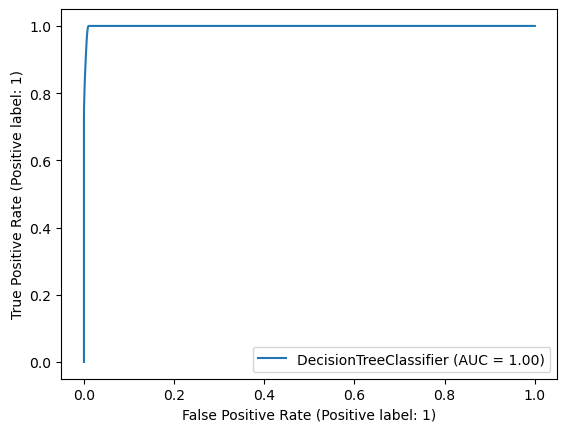

In [113]:
# ROC
RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

#### Insights
- We are getting an accuracy of 90% on test data, with decission tree

### Random Forest

Train accuracy : 0.8553619223220127
              precision    recall  f1-score   support

           0       0.84      0.85      0.85     17883
           1       0.85      0.84      0.85     18146

    accuracy                           0.85     36029
   macro avg       0.85      0.85      0.85     36029
weighted avg       0.85      0.85      0.85     36029



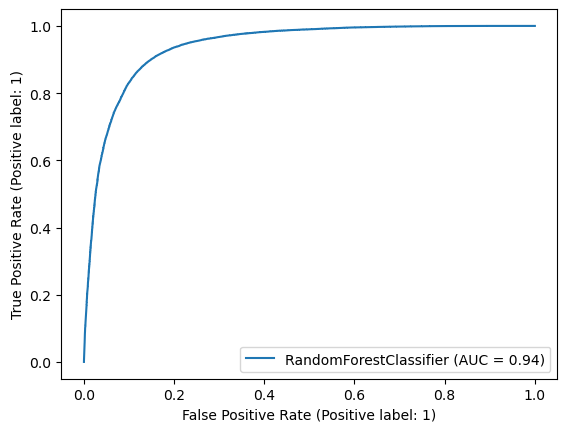

In [115]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

#### HyperParameter Tuning


In [116]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [117]:
grid_search.best_score_

0.9157675510167155

In [118]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

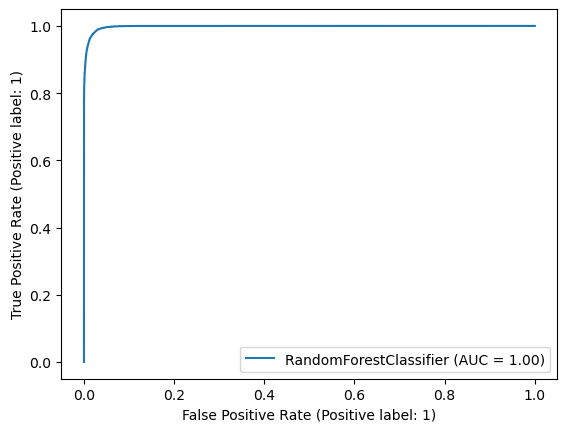

In [119]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()

#### Insights
- We are getting an accuracy of 92% on test data, with random forest

### ADA Boost

In [121]:
from sklearn.ensemble import AdaBoostClassifier

# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7004080046629104

In [122]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

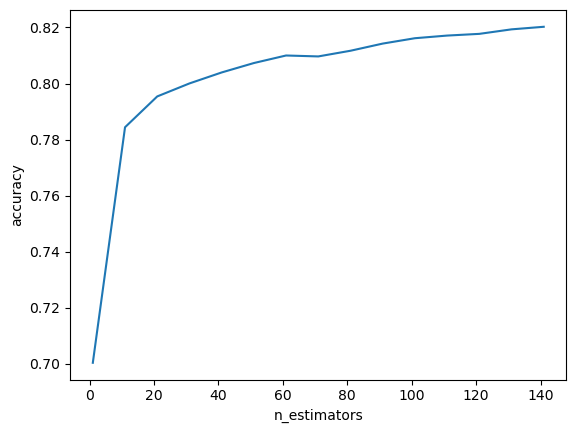

In [123]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [124]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     17883
           1       0.85      0.84      0.85     18146

    accuracy                           0.85     36029
   macro avg       0.85      0.85      0.85     36029
weighted avg       0.85      0.85      0.85     36029



#### Conclusion
- we need to have high rate of correctly identifying the true positives hence the recall.
- we will go with random forest instead of adaboost as that is comparetively simpler model

In [125]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [126]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     42164
           1       0.97      0.99      0.98     41901

    accuracy                           0.98     84065
   macro avg       0.98      0.98      0.98     84065
weighted avg       0.98      0.98      0.98     84065

Report on test data
              precision    recall  f1-score   support

           0       0.93      0.91      0.92     17883
           1       0.92      0.94      0.93     18146

    accuracy                           0.92     36029
   macro avg       0.93      0.92      0.92     36029
weighted avg       0.92      0.92      0.92     36029



In [145]:
#feature importances in PCA
rf_best.feature_importances_

array([0.0450066 , 0.03121359, 0.04799878, 0.07068869, 0.12074266,
       0.0442877 , 0.04185795, 0.09141766, 0.03084482, 0.0619685 ,
       0.03189897, 0.02368769, 0.02343529, 0.03022314, 0.04411441,
       0.0230023 , 0.05048808, 0.0243002 , 0.02454103, 0.02114341,
       0.02243498, 0.02507395, 0.02448275, 0.02295136, 0.02219546])

#### Now predict the details for test Data Given

In [609]:
telecom_df_test = telecom_df_test[X_res.columns]
telecom_df_test

arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0       64.445           0.00           0.00              0.03         29.43   
1      360.868           0.00           0.00              0.00        397.11   
2      746.239          26.08          54.44              0.00          0.00   
3       24.400           0.00           0.00              0.00         22.86   
4      413.329           0.00           0.00              0.00         25.51   
...        ...            ...            ...               ...           ...   
29995  406.150           0.00           0.00              0.00        477.36   
29996  374.981           0.00           0.00              0.00         26.19   
29997  180.194          24.59          15.58              1.65         32.64   
29998  257.439           0.00           0.00              1.99         26.76   
29999  605.320         141.78         179.84              0.00         28.19   

       std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
0                   0.0         28.48           0.0          0.03   
1                   0.0         17.68           0.8          0.00   
2                   0.0          0.00           0.0          0.00   
3                   0.0          0.00           0.0          1.15   
4                   0.0        749.29           0.0          4.96   
...                 ...           ...           ...           ...   
29995               0.0         30.01           0.0          0.00   
29996               0.0        813.83           0.0          0.00   
29997               0.0         15.34           0.0          1.65   
29998               0.0        303.86           0.0          1.99   
29999               0.0        186.61           0.0          3.30   

       og_others_8  ...  gd_ph_spl_ic_mou  gd_ph_roam_og_mou  \
0              0.0  ...              0.44              0.000   
1              0.0  ...              0.00              0.000   
2              0.0  ...              0.00             39.105   
3              0.0  ...              0.00              0.000   
4              0.0  ...              0.00              0.000   
...            ...  ...               ...                ...   
29995          0.0  ...              0.00             60.445   
29996          0.0  ...              0.00              4.145   
29997          0.0  ...              0.00              0.000   
29998          0.0  ...              0.00             13.470   
29999          0.0  ...              0.00            105.785   

       gd_ph_monthly_3g  gd_ph_std_ic_t2f_mou  gd_ph_vol_2g_mb  gd_ph_arpu  \
0                   0.0                 0.000            0.000     78.6060   
1                   0.0                 0.000            0.000    464.8680   
2                   0.0                 0.000            0.000    382.3640   
3                   0.0                 0.000            0.000    107.4700   
4                   0.0                 0.000            0.000    356.5715   
...                 ...                   ...              ...         ...   
29995               0.0                 4.245           10.990    557.5645   
29996               0.5                 0.000            0.000    271.1985   
29997               0.0                 0.000            0.000     88.8515   
29998               0.0                 0.000            0.000    952.0165   
29999               1.5                 0.000          239.105    313.4350   

       gd_ph_fb_user  gd_ph_count_rech_3g  gd_ph_vbc_3g  vbc_3g_8  
0               -1.0                  0.0         0.000      0.00  
1               -1.0                  0.0         0.000      0.00  
2               -1.0                  0.0       500.125    525.61  
3               -1.0                  0.0         0.000      0.00  
4               -1.0                  0.0         0.000      0.00  
...              ...                  ...           ...       ...  
29995            0.0                

In [610]:
telecom_df_test[telecom_df_test.columns] = scaler.transform(telecom_df_test[telecom_df_test.columns])

In [613]:
X_pca_test = pca.transform(telecom_df_test)

In [614]:
Y_test_pred = rf_best.predict(X_pca_test)

In [615]:
np.array(Y_test_pred)

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [616]:
testresult_df = pd.read_csv('test.csv')

In [617]:
pred_series = pd.Series(Y_test_pred,name="churn")
id_series = testresult_df['id']

In [619]:
result_df = pd.DataFrame({'id': id_series ,'churn_probability': Y_test_pred})
result_df

id  churn_probability
0      69999                  0
1      70000                  0
2      70001                  0
3      70002                  0
4      70003                  0
...      ...                ...
29995  99994                  0
29996  99995                  0
29997  99996                  1
29998  99997                  1
29999  99998                  0

[30000 rows x 2 columns]

In [620]:
result_df.to_csv('Submission.csv', index=False)